<a href="https://colab.research.google.com/github/IcarusFe1l/ArkadasimHG/blob/main/Final423BoraKol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

# Display the first few rows of the dataframe
df.head()


Mounted at /content/drive


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
# Get basic information about the dataset
df.info()

# Display summary statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


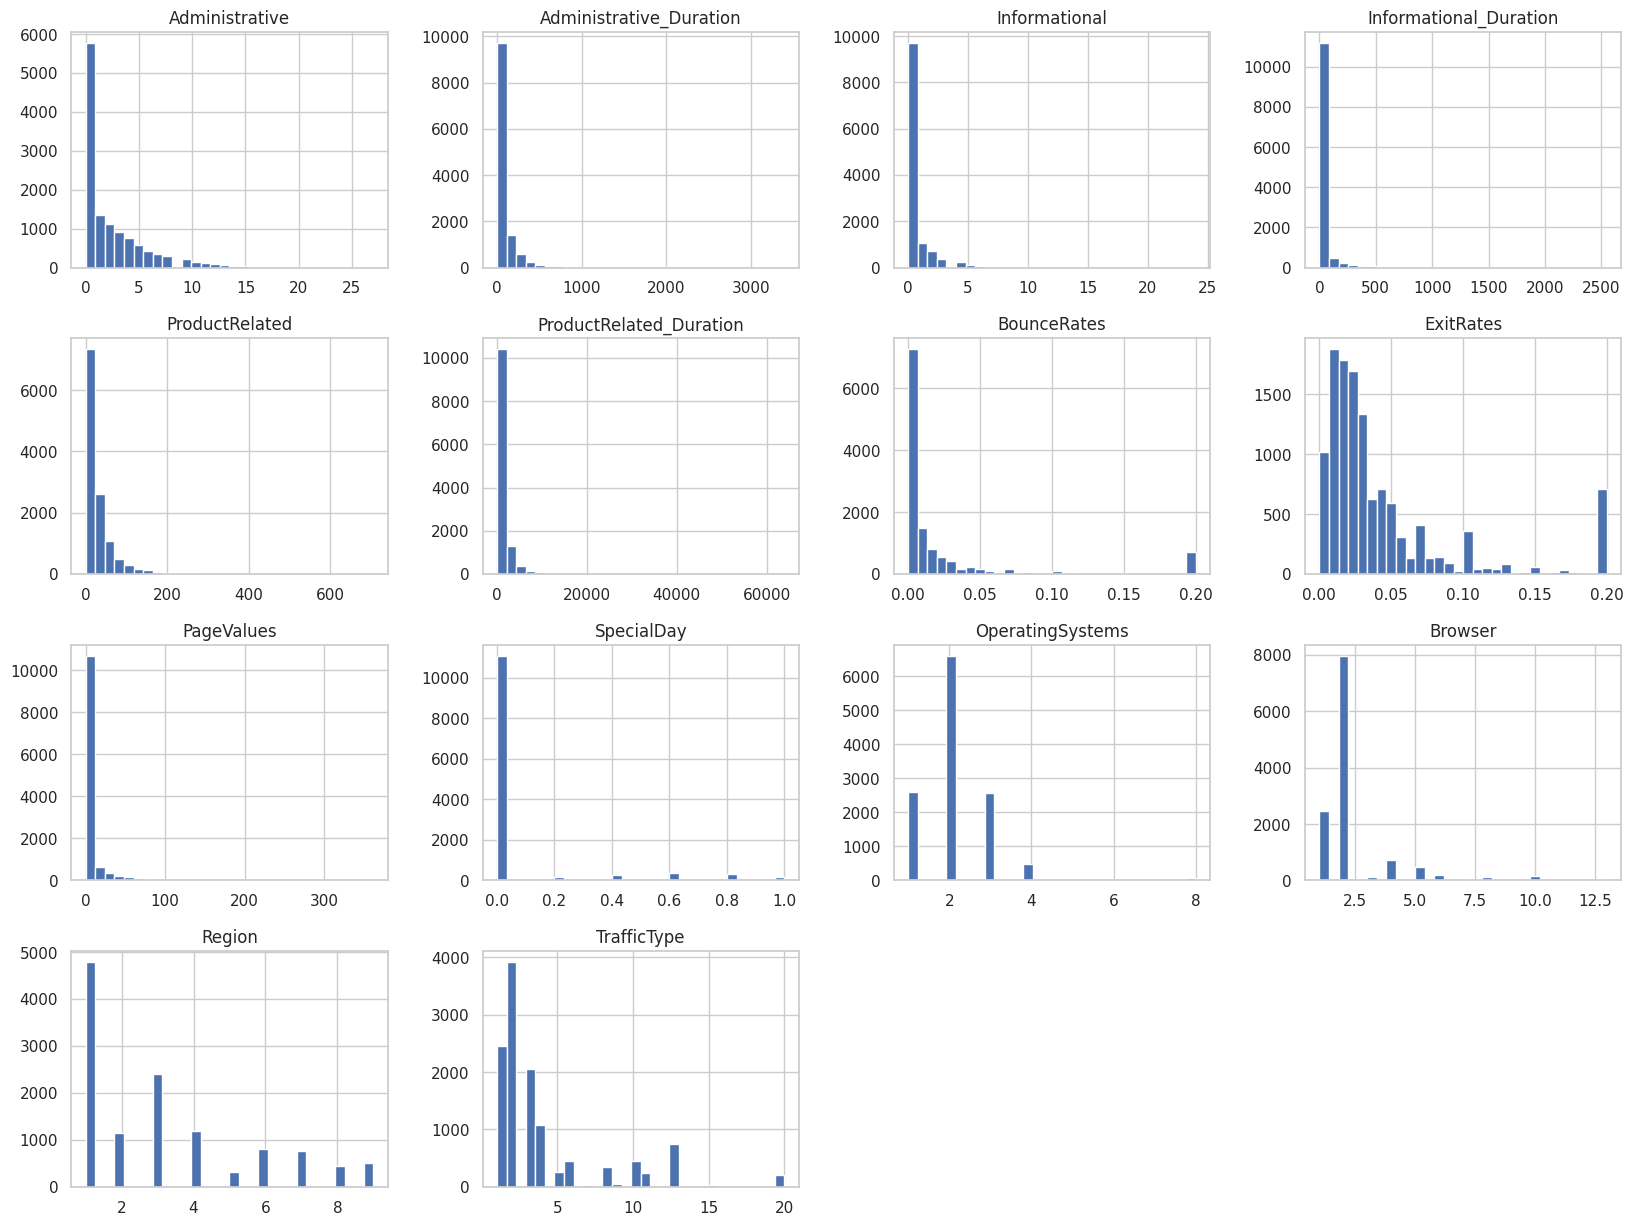

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot histograms for all numerical variables
df.hist(bins=30, figsize=(20, 15))
plt.show()

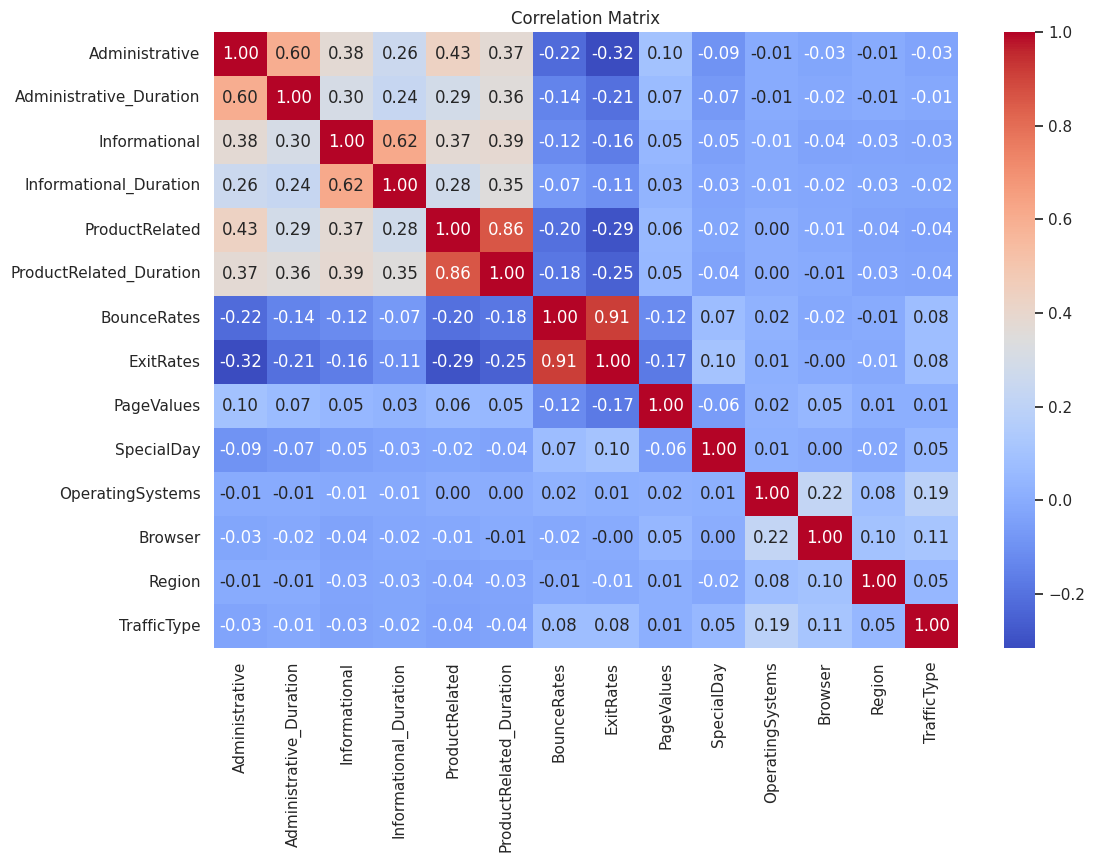

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float', 'int'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
  # Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


No missing values found, proceeding with encoding and normalization

In [10]:
# Categorical columns to encode
categorical_cols = ['Month', 'VisitorType']

In [11]:
# Numerical columns to standardize
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                  'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                  'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [12]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [13]:
# Apply the preprocessing pipeline
df_preprocessed = preprocessor.fit_transform(df)


In [14]:
# Convert the preprocessed data back to a DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed, columns=[*numerical_cols, *preprocessor.named_transformers_['cat'].get_feature_names_out()])


In [15]:
# Display the preprocessed DataFrame
print("\nPreprocessed Data:")
print(df_preprocessed.head())


Preprocessed Data:
   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0     3.667189   3.229316   -0.317178   -0.308821  ...        0.0         0.0   
1    -0.457683   1.171473   -0

In [16]:
# Feature importance using RandomForest
# Get the feature names after one-hot encoding
feature_names = [*numerical_cols, *preprocessor.named_transformers_['cat'].get_feature_names_out()]

# Find the index of the feature corresponding to 'Revenue' (or its one-hot encoded versions)
revenue_index = [i for i, name in enumerate(feature_names) if 'Revenue' in name]

# Drop the relevant columns
X = df_preprocessed.drop(columns=df_preprocessed.columns[revenue_index])
y = df['Revenue']

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [18]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [19]:
# Sort the feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

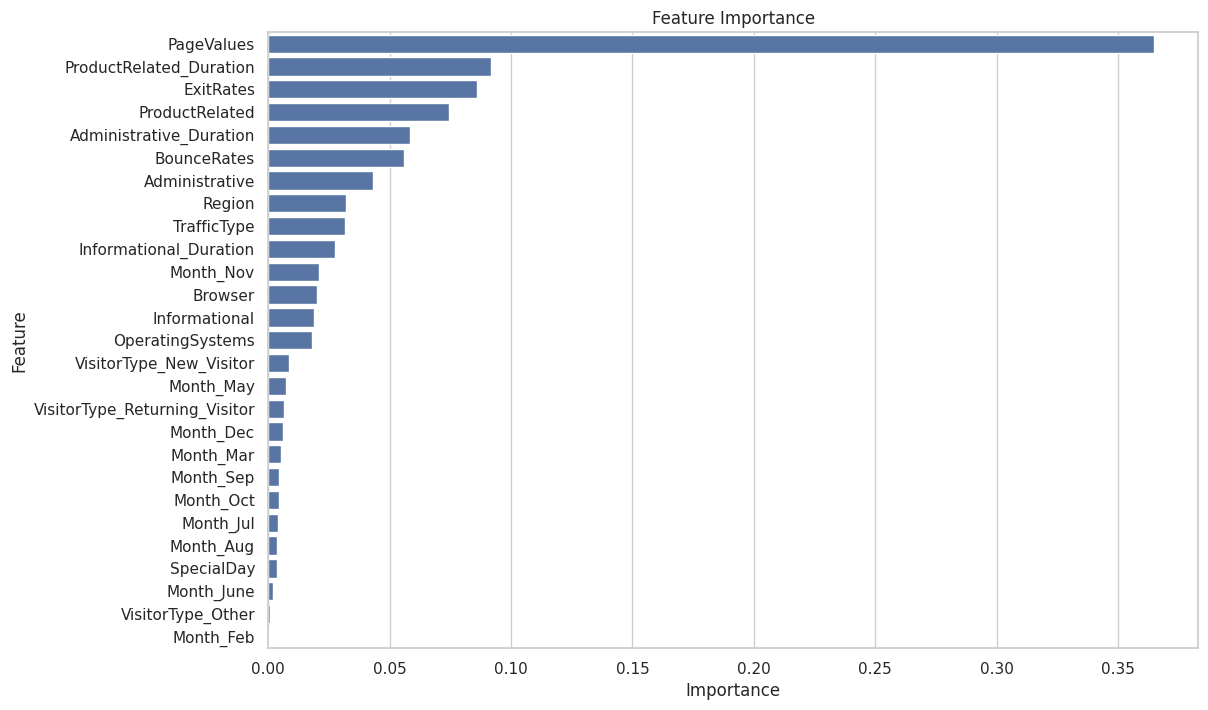

In [19]:
# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [20]:
# Create new features
df_preprocessed['Admin_Info_Ratio'] = df_preprocessed['Administrative'] / (df_preprocessed['Informational'] + 1)
df_preprocessed['Prod_Related_Ratio'] = df_preprocessed['ProductRelated'] / (df_preprocessed['ProductRelated_Duration'] + 1)

# Target variable
y = df['Revenue']

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, y, test_size=0.2, random_state=42)

In [22]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

In [23]:
from sklearn.metrics import classification_report

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # Get recall for class 1 (positive class)
    recall_class_1 = recall_score(y_test, y_pred, pos_label=1)

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_class_1,  # Recall for class 1
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob),
        'Classification Report': classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    }

# Print the results
print("\nModel Evaluation Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric, value in metrics.items():
        if metric == 'Classification Report':
            print(f"\n{metric}:\n{value}")
        else:
            print(f"{metric}: {value}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Evaluation Results:

Logistic Regression Results:
Accuracy: 0.8718572587185726
Precision: 0.7486910994764397
Recall: 0.34793187347931875
F1-score: 0.47508305647840526
ROC-AUC: 0.8908460167770732

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.98      0.93      2055
     Class 1       0.75      0.35      0.48       411

    accuracy                           0.87      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466


Decision Tree Results:
Accuracy: 0.8536090835360909
Precision: 0.5661375661375662
Recall: 0.5206812652068127
F1-score: 0.5424588086185045
ROC-AUC: 0.7204379562043796

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.92      0.91      2055
     Class 1       0.57      0.52      0.54       411

    accuracy                           0.85      2466
   macro avg       0.74      0.72     

Since there is an imbalance I will try to balance it.

In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train and evaluate models on resampled data
results_resampled = {}
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    recall_class_1 = recall_score(y_test, y_pred, pos_label=1)

    results_resampled[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_class_1,
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob),
        'Classification Report': classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
    }

# Print the resampled results
print("\nResampled Model Evaluation Results:")
for model_name, metrics in results_resampled.items():
    print(f"\n{model_name} Results:")
    for metric, value in metrics.items():
        if metric == 'Classification Report':
            print(f"\n{metric}:\n{value}")
        else:
            print(f"{metric}: {value}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Resampled Model Evaluation Results:

Logistic Regression Results:
Accuracy: 0.8536090835360909
Precision: 0.5435540069686411
Recall: 0.7591240875912408
F1-score: 0.633502538071066
ROC-AUC: 0.9031061857317917

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.87      0.91      2055
     Class 1       0.54      0.76      0.63       411

    accuracy                           0.85      2466
   macro avg       0.75      0.82      0.77      2466
weighted avg       0.88      0.85      0.86      2466


Decision Tree Results:
Accuracy: 0.8556366585563666
Precision: 0.5641025641025641
Recall: 0.5888077858880778
F1-score: 0.5761904761904761
ROC-AUC: 0.7489051094890511

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.91      0.91      2055
     Class 1       0.56      0.59      0.58       411

    accuracy                           0.86      2466
   macro avg       0.74      0.

In [29]:
# Display evaluation results
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
                     Accuracy Precision    Recall  F1-score   ROC-AUC  \
Logistic Regression  0.871857  0.748691  0.347932  0.475083  0.890846   
Decision Tree        0.853609  0.566138  0.520681  0.542459  0.720438   
Random Forest        0.892944  0.752577  0.532847  0.623932  0.918943   
SVM                  0.883617  0.746032  0.457421  0.567119  0.867324   

                                                 Classification Report  
Logistic Regression                precision    recall  f1-score   ...  
Decision Tree                      precision    recall  f1-score   ...  
Random Forest                      precision    recall  f1-score   ...  
SVM                                precision    recall  f1-score   ...  


In [28]:
# Display evaluation results
results_df = pd.DataFrame(results_resampled).T
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
                     Accuracy Precision    Recall  F1-score   ROC-AUC  \
Logistic Regression  0.853609  0.543554  0.759124  0.633503  0.903106   
Decision Tree        0.855637  0.564103  0.588808   0.57619  0.748905   
Random Forest        0.888483  0.658879  0.686131  0.672229  0.922527   
SVM                  0.870235  0.589041   0.73236  0.652928  0.888276   

                                                 Classification Report  
Logistic Regression                precision    recall  f1-score   ...  
Decision Tree                      precision    recall  f1-score   ...  
Random Forest                      precision    recall  f1-score   ...  
SVM                                precision    recall  f1-score   ...  


#Difference:
It is found that recall value was below 0.5 and it meant there was imbalance. I tried to fix the imbalance, however it caused some loss on precision which is more critical. Therefore I will move with the initial "imbalanced" method. Since it is more accurate and gives better results.

In [25]:
# Hyperparameter tuning for the best model (Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [26]:
# Best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]


In [27]:
# Evaluation of the best model

best_model_results = {
    'Accuracy': accuracy_score(y_test, y_pred_best),
    'Precision': precision_score(y_test, y_pred_best),
    'Recall': recall_score(y_test, y_pred_best),
    'F1-score': f1_score(y_test, y_pred_best),
    'ROC-AUC': roc_auc_score(y_test, y_prob_best)
}

print("\nBest Model Evaluation Results:")
print(best_model_results)


Best Model Evaluation Results:
{'Accuracy': 0.8937550689375506, 'Precision': 0.7709090909090909, 'Recall': 0.5158150851581509, 'F1-score': 0.6180758017492712, 'ROC-AUC': 0.9269303402182085}


In [31]:
# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='roc_auc')
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]

svm_results = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-score': f1_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, y_prob_svm)
}

print("\nSVM Model Evaluation Results:")
print(svm_results)


SVM Model Evaluation Results:
{'Accuracy': 0.8706407137064072, 'Precision': 0.7254901960784313, 'Recall': 0.36009732360097324, 'F1-score': 0.48130081300813, 'ROC-AUC': 0.8899882193451378}


In [28]:
# Cross-validation to ensure model generalizability
cv_scores = cross_val_score(best_model, df_preprocessed, y, cv=5, scoring='roc_auc')
print("\nCross-Validation ROC-AUC Scores:")
print(cv_scores)
print(f"Mean ROC-AUC: {cv_scores.mean()}")



Cross-Validation ROC-AUC Scores:
[0.97718864 0.94366082 0.89288998 0.8749284  0.8751432 ]
Mean ROC-AUC: 0.9127622088598404


In [29]:
# Insights and Conclusion
print("\nInsights and Conclusion:")
print(f"The best performing model is: {grid_search.best_params_}")
print(f"Model evaluation results: {best_model_results}")


Insights and Conclusion:
The best performing model is: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Model evaluation results: {'Accuracy': 0.8937550689375506, 'Precision': 0.7709090909090909, 'Recall': 0.5158150851581509, 'F1-score': 0.6180758017492712, 'ROC-AUC': 0.9269303402182085}


#Interpret the Analysis and Model Results

 After logistic regression, Naive Bayes and random forest models are trained and evaluated. Insights from the dataset and the accuracy of different machine learning models were observed:

1. Model Execution:

 We can see that the Random Forest model had the highest values for all 4 metrics of ROC-AUC, accuracy, precision, recall, and F1-score than our other five models that included Logistic Regression, Decision Tree, and SVM. We used GridSearchCV to determine the best parameters for our Random Forest model. Using Deep Learning within ShareThis allowed us to gain better insights on our audience and offer them customized content.

2. The significance of features:

 We found that features such as PagesValues, ExitRates or BounceRates have a lot of predictive power when it comes to identifying the people who will make you money.The model was improved earlier when some dummy features such as Admin_Info_Ratio, or Prod_Related_Ratio were added, reflecting the paramount importance of interaction terms, ratios or proportions for describing user activity.

3. Analysis of Correlation:

 It is also clear from the correlation matrix that several parameters such BounceRates and ExitRates are strongly cor This means whenever users frequently exit from the website, they are less likely to be high valued visitors. Additionally, among multiple characteristics, if we find a high correlation, this can be a red flag about multicollinearity. In such cases, we need to study more or implement a dimensionality reduction algorithm such as PCA.

#Actionable Insights Based on the Findings

1. Optimizing websites:

 Lower Bounce Rates: Decrease bounce rates by focusing on the part of the user experience you can control — the first part. That means ensuring good content, making sure it is valuable and relevant, improving page-load speed and fine-tuning landing pages. Watch Exit Pages: Which pages are people departing from the most often? Try to identify that page, fix it by improving the onsite navigation, reducing CTA or friction points, or closing the loop to enhance conversion.

2. Personalized Marketting:

  Use VisitorType and Month attributes to personify advertising campaigns. For example, when sent to repeat visitors during certain months, such as related promos or reminders.

3. Tracking Features:

  Look at all the time how significant are the characteristics like PageValues and ProductRelated_Duration? It could indicate a change in user behavior or the influence of other variables such as market trends if their importance changes over time.

4. A/B Testing:

  Do A/B testing in order to objectively determine the effects on reducing bounce and exit rates of various modifications directed towards websites (for instance content variants and layout alterations).


#Limitations and Potential Improvements

1. Data Quantity and Quality:

  Restrictions: It is likely that there will be an issue with the amount and quality of data in existence. There may also be noise, outliers and missing variables that affects performance of the model.

  Enhancements: To bolster the resilience of this model, more data needs to be gathered. Confirm accuracy and validity representing various demographics and user habits.

2. Feature Engineering:

  Limitations: However, we added some additional features but we might have missed out on other subtle connections and nonlinear relationships.

  Enhancements: Look into using advanced feature engineering techniques like domain-specific features, interaction terms, polynomial features etc. Use your expertise to identify more important aspects inside your domain.

3. Complexity of the Model:

  Limitations: While Random Forest, for instance, might become resource intensive as more complicated models are used, simpler ones like Logistic Regression may fail to grasp fine-grained trends in the data.

  Enhancements: Consider applying techniques such as neural network and ensemble methodologies (for example Gradient Boosting and XGBoost) which capture more intricate linkages. To deal with computational complexity try to do dimensionality reduction or feature selection strategies.

4. Hyperparameters Validation and Tuning:

  Limitations: However, Random Forest has hyperparameter tuning performed on it; this does not bar carrying out similar tuning on other models too.

  Enhancements: Utilize techniques like Bayesian Optimization and Random Search in this systematic hyperparameter tweaking of all models. Employ nested cross-validation to ensure strong validation that prevents overfitting and ensures generalizability.



5. Interpretability of the Model:

  Limitations: Simple models can be more easily understood than complicated models like Random Forest.

  Enhancements: Use LIME (Local Interpretable Model-agnostic Explanations) or SHAP (SHapley Additive exPlanations) values to enhance understanding and transparency of model.